# Project Part 1


### import usful packages

In [1]:
import sys
sys.path.insert(0, "/Users/shuai/Desktop/project/Resources/Modules")

In [369]:
import pandas as pd
import pprint
import string
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np

import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
import seaborn as sns

#Personal module for quick Descriptive Stat Viz
import visual_descriptiveStats as vds
from pivotToDf import pivotTab_toDF

matplotlib.rcParams['figure.figsize'] = (10, 10)

import visual_descriptiveStats as viz_personal

### import data to pandas dataframe

In [41]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
df = pd.read_csv("subj_measures (1).csv") 
# Preview the first 5 lines of the loaded data 
df.head()

,date,user_id,type,value
0,2019-06-08T23:19:34.418Z,2348,mood,2.76
1,2019-06-13T16:33:34.399Z,5232,sleep,2.44
2,2018-12-26T14:24:00.436Z,4209,sleep,1.88
3,2019-07-17T20:11:23.792Z,2802,mood,2.20
4,2019-05-09T17:27:50.900Z,2025,mood,4.00


In [45]:
print("Data Types of and features for all datasets:\n\n  ",df.dtypes)

Data Types of and features for all datasets:

   date       datetime64[ns]
user_id             int64
type               object
value             float64
dtype: object


### Compute general statistics for this dataset:
#### find the mean and count grouped by userid 

In [92]:
df_st = df.groupby(['user_id']).agg(['mean', 'count'])
df_st.columns = [ ' '.join(str(i) for i in col) for col in df_st.columns]
df_st.reset_index(inplace=True)
df_st = df_st.rename(columns={"value mean": "average score", "value count": "data points count"})
df_st = df_st.sort_values(by=["average score","data points count"])
df_st

,user_id,average score,data points count
23,1411,1.945556,51
36,2020,1.968084,11
28,1514,2.012180,22
69,5085,2.055151,42
66,4330,2.066116,17
93,7652,2.073832,29
92,7618,2.102239,22
15,1260,2.120676,31
56,3182,2.121916,20
45,2497,2.168059,22


#### find the mean and count grouped by userid and type of of rating

In [42]:
# df.groupby(['user_id','type']).mean()
df_new = df.groupby(['user_id','type']).agg(['mean', 'count'])
df_new.columns = [ ' '.join(str(i) for i in col) for col in df_new.columns]
df_new.reset_index(inplace=True)
df_new = df_new.rename(columns={"value mean": "average score", "value count": "data points count"})
df_new = df_new.sort_values(by=["average score","data points count"])
df_new

,user_id,type,average score,data points count
59,1260,ruminationStress,0.000000,1
272,5497,anticipatoryStress,0.000000,1
304,6984,ruminationStress,0.000000,1
113,1534,ruminationStress,0.100000,2
94,1487,ruminationStress,0.120000,1
110,1522,ruminationStress,0.120000,1
296,6876,ruminationStress,0.284323,1
168,2497,anticipatoryStress,0.720000,2
16,884,anticipatoryStress,0.892926,1
232,3609,ruminationStress,1.000000,1


### Conduct simple data cleaning steps

In [93]:
#convert date to standard pandas datetime
df["date"] = pd.to_datetime(df["date"])
#check is there any missing value
def nans(df): return df[df.isnull().any(axis=1)]
print(len(nans(df)), 'missing value in this dataset and no duplicate rows.')
#Deleting duplicate rows, if they exist.
df.drop_duplicates(inplace = True)

0 missing value in this dataset and no duplicate rows.


### Check number of users in this dataset 

In [94]:
# number of users in dataset
len(df['user_id'].unique())

100

### Split current df to 4 Subjective Metrics df based on their type

In [95]:
df_mood = df.loc[df['type'] == 'mood']
df_anticipatoryStress = df.loc[df['type'] == 'anticipatoryStress']
df_ruminationStress = df.loc[df['type'] == 'ruminationStress']
df_sleep = df.loc[df['type'] == 'sleep']

### Check each Subjective Metric data points amount

In [49]:
#Rows x Columns
print("Total of rows and features for mood:, ",df_mood.shape)
print("Total of rows and features for anticipatoryStress:, ",df_anticipatoryStress.shape)
print("Total of rows and features for ruminationStress:, ",df_ruminationStress.shape)
print("Total of rows and features for sleep:, ",df_sleep.shape)

Total of rows and features for mood:,  (3397, 4)
Total of rows and features for anticipatoryStress:,  (332, 4)
Total of rows and features for ruminationStress:,  (316, 4)
Total of rows and features for sleep:,  (3415, 4)


### Draw a bar chart to discover the Mean & Std of Score/Rate in each Subjective Metric

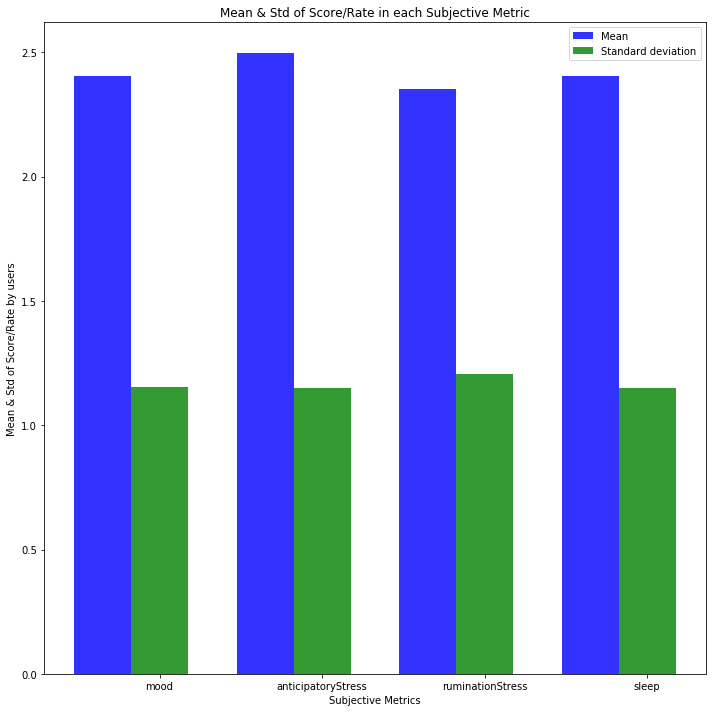

means (2.4042158315151307, 2.4959099361256665, 2.35355785299425, 2.404878249280746)
standard deviation [1.1532356043087453, 1.1482253083718124, 1.206063953740511, 1.1499065358569591]


In [359]:
#The columns, datatypes, data, and countries we want for visualizing our datasets
# data to plot
n_groups = 4
means = (df_mood["value"].mean(),df_anticipatoryStress["value"].mean(), df_ruminationStress["value"].mean(),df_sleep["value"].mean())
stds = [df_mood["value"].std(),df_anticipatoryStress["value"].std(), df_ruminationStress["value"].std(),df_sleep["value"].std()]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means, bar_width,
alpha=opacity,
color='b',
label='Mean')

rects2 = plt.bar(index + bar_width, stds, bar_width,
alpha=opacity,
color='g',
label='Standard deviation')

plt.xlabel('Subjective Metrics')
plt.ylabel('Mean & Std of Score/Rate by users')
plt.title('Mean & Std of Score/Rate in each Subjective Metric')
plt.xticks(index + bar_width, ('mood', 'anticipatoryStress', 'ruminationStress', 'sleep'))
plt.legend()

plt.tight_layout()
plt.show()

print('means', means)
print('standard deviation', stds)

Text(0, 0.5, 'Count frequency percentages')

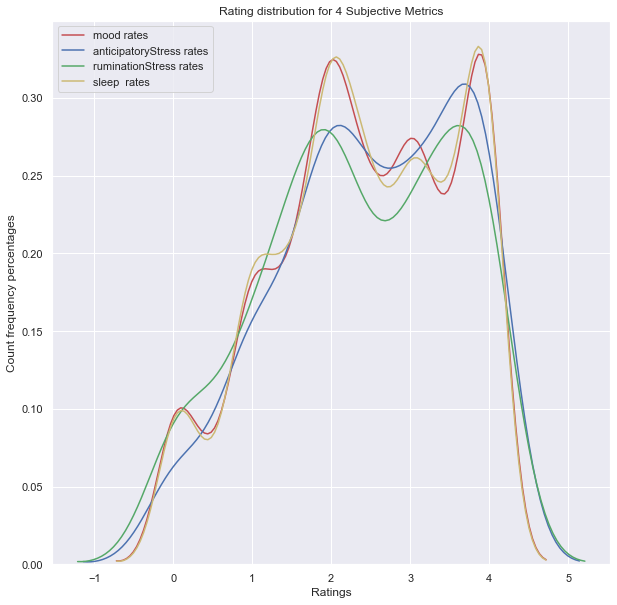

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
sns.kdeplot(df_mood['value'], label="mood rates", color = 'r');
sns.kdeplot(df_anticipatoryStress['value'], label="anticipatoryStress rates", color = 'b');
sns.kdeplot(df_ruminationStress['value'], label="ruminationStress rates", color = 'g');
sns.kdeplot(df_sleep['value'], label="sleep  rates", color = 'y');
plt.title('Rating distribution for 4 Subjective Metrics')
# Set x-axis label
plt.xlabel('Ratings')
# Set y-axis label
plt.ylabel('Count frequency percentages')

### Create a function to draw bar chart of top 5 users with the highest/lowest 5 average ratings for different Subjective Metrics

In [47]:
def top_user_bar(df, column, boolean, tp, num=10): # getting the top 5 users with highest rating
    sorted_df = df.groupby(['user_id']).mean().sort_values(column, ascending= boolean).iloc[:num]
    sorted_df.reset_index(inplace=True)
    ax = sorted_df[column].plot.bar()
    labels = []
    for item in sorted_df['user_id']:
        item = str(item)                       
        labels.append(item[:10])      
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    plt.xlabel('user id')
    plt.ylabel('mean value in '+ tp)
    if boolean == False:
        plt.title('Top 5 user with highest '+tp+' value')
    else:
        plt.title('Top 5 user with lowest '+tp+' value')
    plt.show()
    print(sorted_df)

### Create a bar chart of top 5 users with the highest/lowest 5 average ratings for the 4 Subjective Metrics and list the user id and average scores

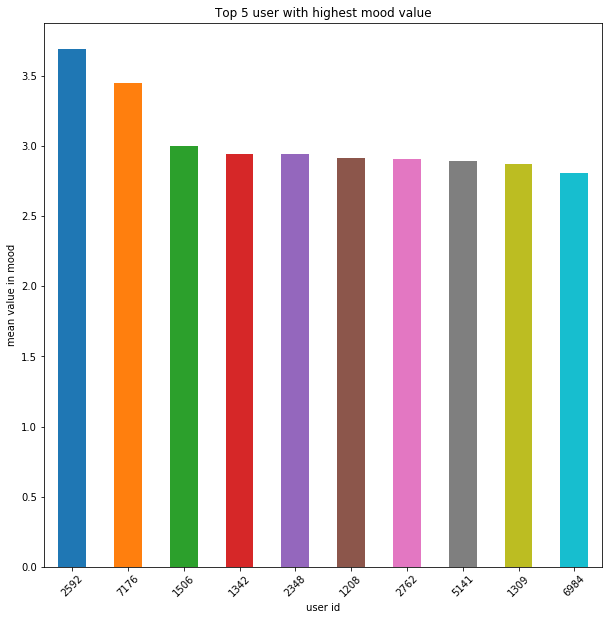

   user_id     value
0     2592  3.693333
1     7176  3.451277
2     1506  3.002360
3     1342  2.944291
4     2348  2.943722
5     1208  2.912969
6     2762  2.907839
7     5141  2.891555
8     1309  2.872058
9     6984  2.809511


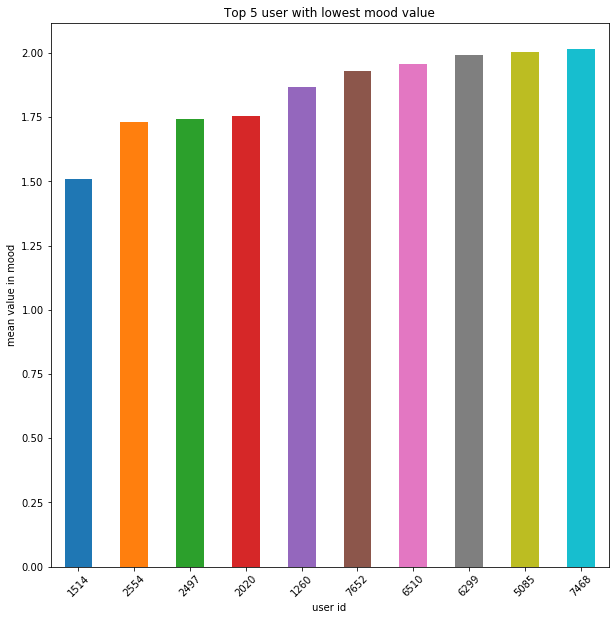

   user_id     value
0     1514  1.509240
1     2554  1.730531
2     2497  1.744792
3     2020  1.752809
4     1260  1.868749
5     7652  1.930731
6     6510  1.958416
7     6299  1.993613
8     5085  2.004538
9     7468  2.015519


In [225]:
top_user_bar(df_mood, 'value', False, 'mood')
top_user_bar(df_mood, 'value', True, 'mood')


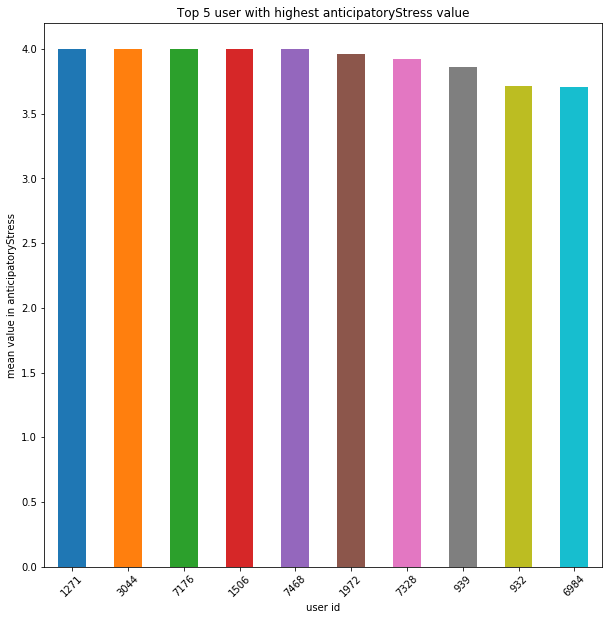

   user_id     value
0     1271  4.000000
1     3044  4.000000
2     7176  4.000000
3     1506  4.000000
4     7468  4.000000
5     1972  3.960000
6     7328  3.920000
7      939  3.861013
8      932  3.714381
9     6984  3.706188


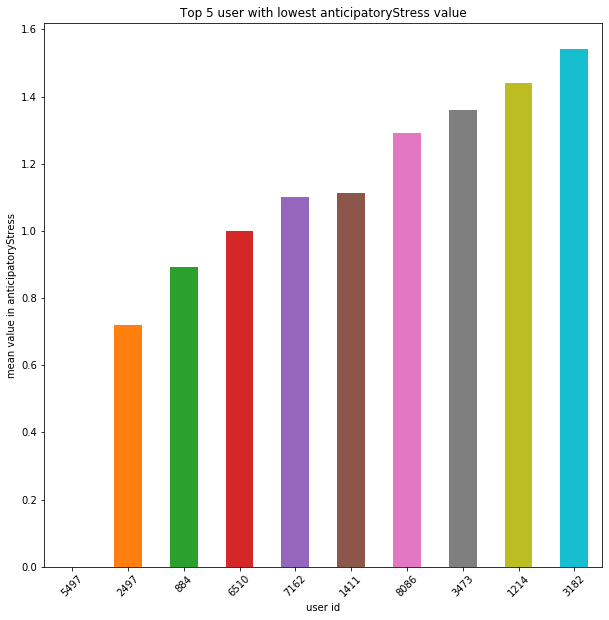

   user_id     value
0     5497  0.000000
1     2497  0.720000
2      884  0.892926
3     6510  1.000000
4     7162  1.100785
5     1411  1.112000
6     8086  1.291088
7     3473  1.360000
8     1214  1.440000
9     3182  1.541598


In [226]:
top_user_bar(df_anticipatoryStress, 'value', False, 'anticipatoryStress')
top_user_bar(df_anticipatoryStress, 'value', True, 'anticipatoryStress')

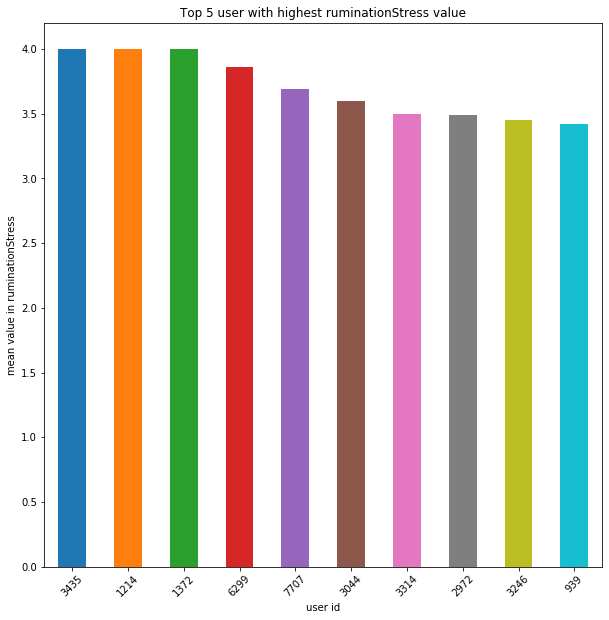

   user_id     value
0     3435  4.000000
1     1214  4.000000
2     1372  4.000000
3     6299  3.859545
4     7707  3.694091
5     3044  3.600000
6     3314  3.500000
7     2972  3.489192
8     3246  3.453030
9      939  3.422068


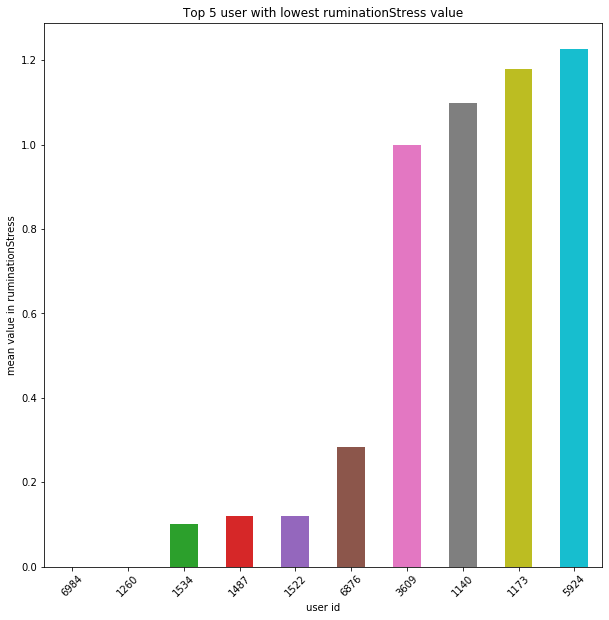

   user_id     value
0     6984  0.000000
1     1260  0.000000
2     1534  0.100000
3     1487  0.120000
4     1522  0.120000
5     6876  0.284323
6     3609  1.000000
7     1140  1.099777
8     1173  1.180000
9     5924  1.226667


In [227]:
top_user_bar(df_ruminationStress, 'value', False, 'ruminationStress')
top_user_bar(df_ruminationStress, 'value', True, 'ruminationStress')

### Create a function to draw line charts of top 7 users rate trend with lowest score in 4 subjective metrics and visualize the trends from 2018 to 2019

In [96]:
def user_trend(df,tp,setdata):
    color = ['b','g','r','c','m','k','y']
    dic ={}
    for i in range(len(setdata)):
        order = np.argsort(df.loc[df['user_id'] == setdata[i]]['date'] )
        x_trendDate = np.array(df.loc[df['user_id'] == setdata[i]]['date'])[order]
        y_views = np.array(df.loc[df['user_id'] == setdata[i]]['value'] )[order]
        new_dic = {setdata[i]:[x_trendDate,y_views]}
        dic.update(new_dic)
        print("During 2018 to 2019, the average rate of "+ tp +' is ' + str(df.loc[df['user_id'] == setdata[i]].mean()[1])+" for user: " + str(setdata[i]))
        plt.figure(1)
        plt.subplot(211)
        plt.title('top 7 users rate trend with extreme scores in ' + tp + " (from 2018 to 2019)")
        plt.xticks(rotation = "vertical")
        plt.xlabel("Date")
        plt.ylabel("Rate")
        plt.plot(dic[setdata[i]][0],dic[setdata[i]][1],color=color[i],marker='o', label=str(setdata[i]))
    # Place a legend to the right of this smaller subplot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

During 2018 to 2019, the average rate of mood is 1.509239676346125 for user: 1514
During 2018 to 2019, the average rate of mood is 1.7305308781625832 for user: 2554
During 2018 to 2019, the average rate of mood is 1.744792247061111 for user: 2497
During 2018 to 2019, the average rate of mood is 1.7528094609566667 for user: 2020
During 2018 to 2019, the average rate of mood is 1.8687488555909997 for user: 1260
During 2018 to 2019, the average rate of mood is 1.9307313384209168 for user: 7652
During 2018 to 2019, the average rate of mood is 1.958415882354625 for user: 6510


/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same argum

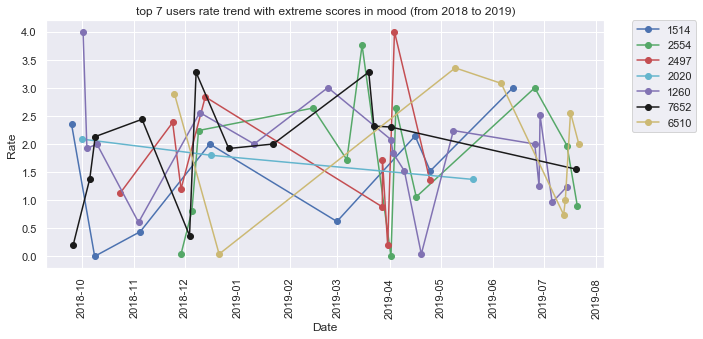

During 2018 to 2019, the average rate of anticipatoryStress is 4.0 for user: 1271
During 2018 to 2019, the average rate of anticipatoryStress is 4.0 for user: 3044
During 2018 to 2019, the average rate of anticipatoryStress is 4.0 for user: 7176
During 2018 to 2019, the average rate of anticipatoryStress is 4.0 for user: 1506
During 2018 to 2019, the average rate of anticipatoryStress is 4.0 for user: 7468
During 2018 to 2019, the average rate of anticipatoryStress is 3.96 for user: 1972
During 2018 to 2019, the average rate of anticipatoryStress is 3.92 for user: 7328


/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same argum

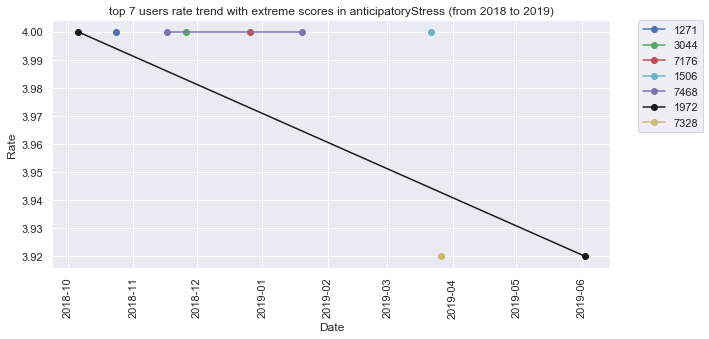

During 2018 to 2019, the average rate of ruminationStress is 4.0 for user: 3435
During 2018 to 2019, the average rate of ruminationStress is 4.0 for user: 1214
During 2018 to 2019, the average rate of ruminationStress is 4.0 for user: 1372
During 2018 to 2019, the average rate of ruminationStress is 3.85954487324 for user: 6299
During 2018 to 2019, the average rate of ruminationStress is 3.6940908432 for user: 7707
During 2018 to 2019, the average rate of ruminationStress is 3.6 for user: 3044
During 2018 to 2019, the average rate of ruminationStress is 3.500000033333333 for user: 3314


/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same argum

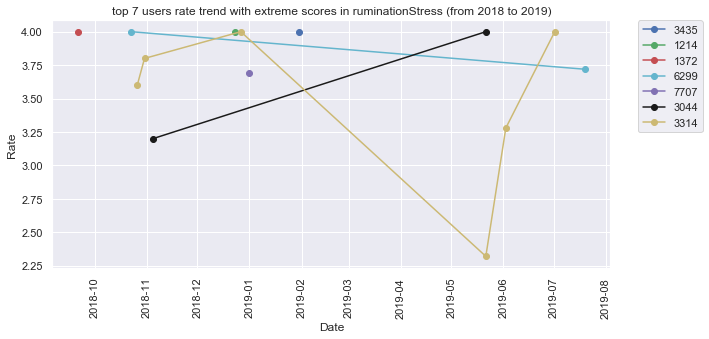

During 2018 to 2019, the average rate of sleep is 1.44000005 for user: 8371
During 2018 to 2019, the average rate of sleep is 1.6948045313943574 for user: 2928
During 2018 to 2019, the average rate of sleep is 1.7419228428528568 for user: 4330
During 2018 to 2019, the average rate of sleep is 1.8364129003459129 for user: 1411
During 2018 to 2019, the average rate of sleep is 1.8488826764246156 for user: 7618
During 2018 to 2019, the average rate of sleep is 1.9870615557988858 for user: 5085
During 2018 to 2019, the average rate of sleep is 1.9918496521533333 for user: 2020


/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/shuai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same argum

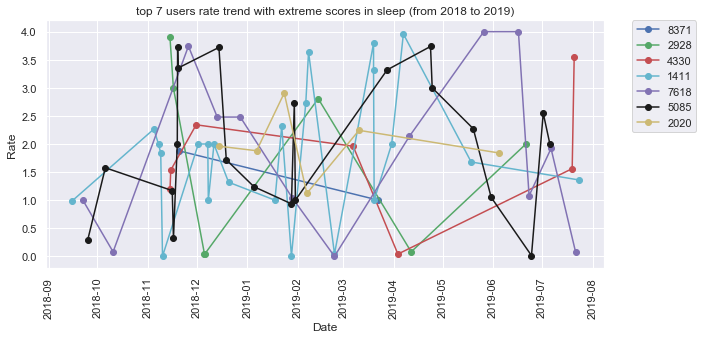

In [97]:
def poor_user_record_chart(df, column, boolean, tp, num=7): # getting the top 7 users with lowest score in each Subjective Metric
    sorted_df = df.groupby(['user_id']).mean().sort_values(column, ascending= boolean).iloc[:num]
    sorted_df.reset_index(inplace=True)
    setdata = sorted_df['user_id'].unique()
    user_trend(df,tp,setdata)
    
poor_user_record_chart(df_mood, 'value', True, 'mood')
poor_user_record_chart(df_anticipatoryStress, 'value', False, 'anticipatoryStress')
poor_user_record_chart(df_ruminationStress, 'value', False, 'ruminationStress')
poor_user_record_chart(df_sleep, 'value', True, 'sleep')

### Create a function to generate pie charts to describe number of data points for each user in 4 Subjective Metrics

In [354]:
def piechart(df ,typeCheck):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = df['user_id'].unique()
    freq =[]
    for i in labels:
        freq.append(df.loc[df['user_id'] == i].count()[3])
    explode =  (0.1,)
    explode = explode + tuple([0 for i in range(len(labels)-1)])
    fig1, ax1 = plt.subplots()
    ax1.pie(freq, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('User data count for '+typeCheck +' Subjective Metric', y=1.08)
    plt.show()

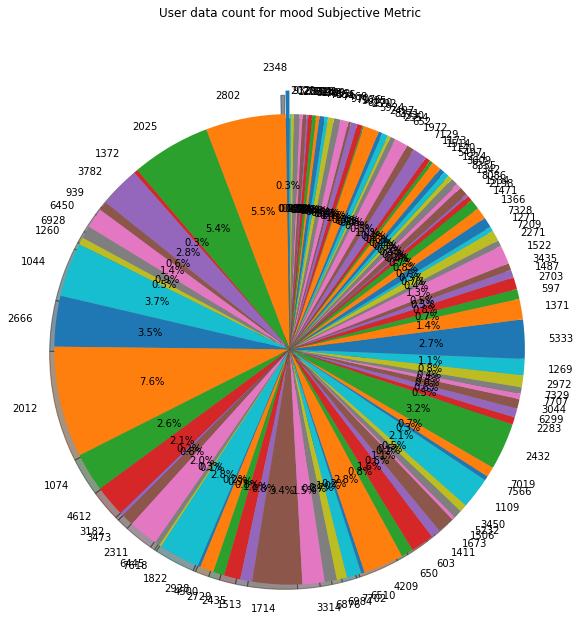

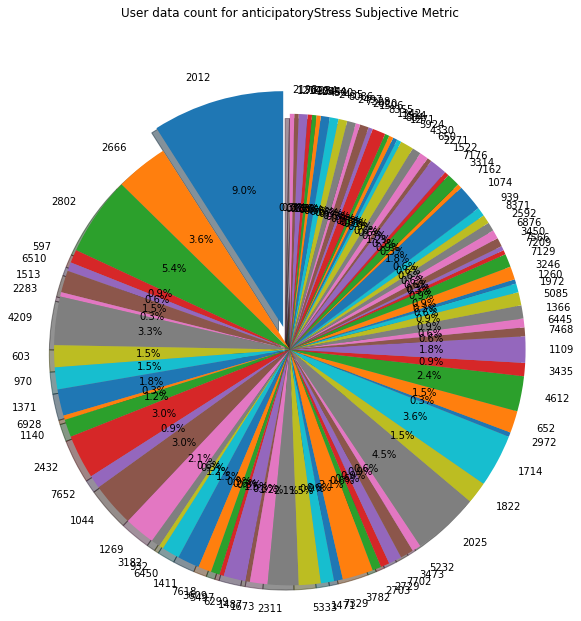

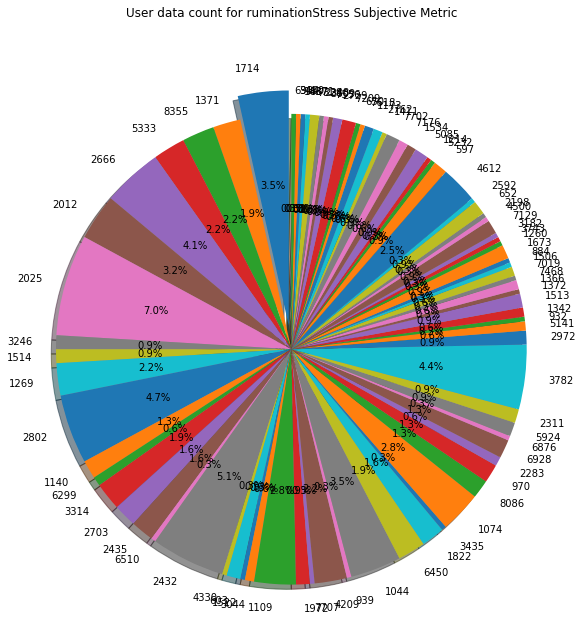

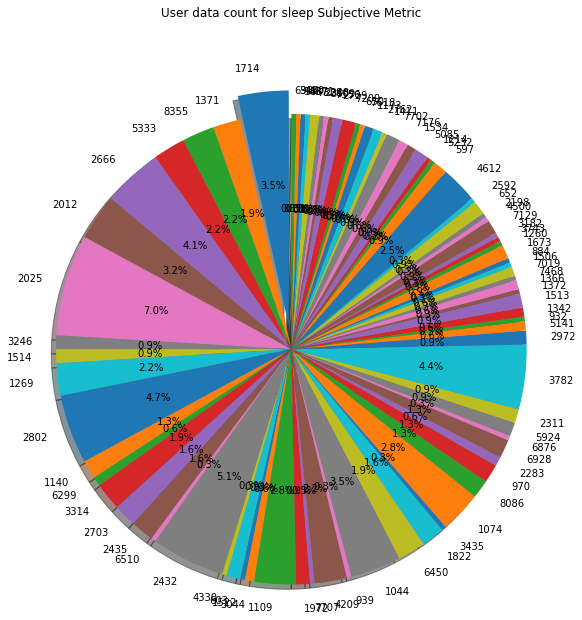

In [355]:
piechart(df_mood, 'mood')
piechart(df_anticipatoryStress, 'anticipatoryStress')
piechart(df_ruminationStress, 'ruminationStress')
piechart(df_ruminationStress, 'sleep')

### Create a Correlation Matrix with Heatmap function to find whether there is a relationship between userid and their rates

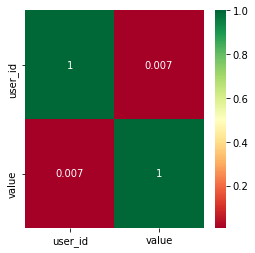

In [370]:
# Correlation states how the features are related to each other or the target variable.
# Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
# Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.
def corrlelation_check(df):
    X = df.iloc[:,0:3]  #independent columns
    y = df.iloc[:,-1]    #target column i.e price range
    #get correlations of each features in dataset
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(4,4))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corrlelation_check(df)

## Data Assumptions:
### Assumptions about the contents of the data:
Due to the potential errors or corruption in the date formatting for date, in practice, I saw dates far outside the range that I assumed, as well as some other dates that were questionable. My assumption about the date range was certainly one that needed to be checked.

In addition, I also need to watch out for is missing data or place-holder values. We tend to assume — or at least hope — that all fields in the data contain a usable value. But, often there are some missing value in CSV data there might be “NA”, “NaN”, or a blank space where a number should be. It’s always a good idea to check to see if such place-holder values occur often enough to cause problems.

### Assumptions about the distribution of the data:
The common data assumptions are: random samples, statistical independence, normality, equal variance, stability. 

1. Random Samples:

Random samples means  sample is random when each data point in your population has an equal chance of being included in the sample; therefore selection of any individual happens by chance, rather than by choice. This reduces the chance that differences in materials or conditions strongly bias results. Random samples are more likely to be representative of the population; therefore you can be more confident with your statistical inferences with a random sample. 

2. Statistical independence:

Statistical independence is a critical assumption for many statistical tests, such as the 2-sample t test and ANOVA. Independence means the value of one observation does not influence or affect the value of other observations. Independent data items are not connected with one another in any way (unless you account for it in your model). This includes the observations in both the “between” and “within” groups in your sample. Non-independent observations introduce bias and can make your statistical test give too many false positives.  

Generally, plotting the data using a histogram or scatter-plot can tell us whether the assumption us want to make is reasonable. I didn’t use any of the statistical tests for normality, partially because I was dealing with the tail of the distribution — -only the worst performances, not all performances in history — -but also because I intended to use the normal distribution unless it was obviously inappropriate for the data. To me, visually comparing the histogram with a plot of the normal distribution sufficed as verification of the assumption. The histogram for 4 Subjective Metrics distributions were not quit similar to the bell curve since all of them have two peaks and all 4 distributions are quit simular to each other. 

### Insights:

From the general statistics for this dataset and pie chart of describing number of data points for each user in 4 Subjective Metrics, I find the there are more data points(about 3400) in mood and sleep subjective matrics than anticipatoryStress and ruminationStress which are only about 320. Therefore, we should collection more user information in anticipatoryStress and ruminationStress. I guesss the reason why these two categories have less data is because they are more general, harder to scale and more private than the general sleep and mood. Beside, from the pie chart describe number of data points for each user in 4 Subjective Metrics, I find the data points amount for same user data for 4 subjective matrixs are very unevenly distributed for example, user with id 2554, 5497, 1271, 1487,2497, 6510, 6984, 6928 only has 1 or 2 data points in anticipatoryStress compare with user with id 2012 has 28 data points in this category. The users with id 1260, 6984, 1487, 1534, 1487, 1522, 6876, 2497, 884, 3609, and 7162 only have 1 data point in ruminationStress, which is really less than the user with id 1714 with 12 data points. Thus, we need to collect more data from the users listed above. For more information, please check df_new for more general statistic infor. 

In addition, I find the Mean & Std of Score/Rate in each Subjective Metric looks very even and data distributions among all Subjective Metrics are similar. I pay attention on analyzing the data at the left tail which are the "worst" cases for the users who have average low score in each Subjective Metric. Then I find out several reason why the users have lowest scores in sleep/mood or highest scores on stress:

1. lack of data points in ruminationStress and anticipatoryStress: 
For example, for user with id 1271, 3044, 7176, 1506, 7468 in anticipatoryStress category and for user 3435, 1214, 1372,  6299 in ruminationStress category, they only have 1 or 2 data points with extreme stress in these fields. Since the infor is very limited, we need to pay more attention on collecting infor from these user. In addition, we also need to pay attention to 6299, 7707, 3044, 3314,  2972,  3246 , 939 for ruminationStress and 1972,  7328, 939,  932,  6984 for anticipatoryStress, since he/she used to have a general highest score(Extremely) in Stress for a long time. We specially need to care about users with id 3044 and 3314 for their ruminationStress and user with id 7468 for anticipatoryStress, since the ruminationStress scores start with very high at the beginning, goes lower in the middle but the score gets higher to apprach 4(Extremely) at the end. 

2. long term low score or scoring with a downward trend in sleep and mood:

Additionally, I also visualize the trend of score points changes in 4 subjective metrics for these users from the end of 2018 to middle of 2019. From the line chart in mood, I find the scale in mood for patients id with 2554, 2497, 2020, 1260, 7652 and 6510 getting worse as time goes, especially for user with id 1260 and 2554 and 7652 and 6510, their score in mood changes dramatrically with downward trend. From the line char in sleep, I find the scale in sleep for patients id with 5085, 2020, and 1417 getting worse as time goes, so we need to do more research on observing their mood/sleep status.  

3. Overall extreme scores in all subjective metric:

In general, the users with id 1411, 2020, 1514, 5085, 4330 are top 5 users with the lowest overall average scores in 4 subjective metrics and lowest scores are between 1.945556 to 2.066116, so we need to do more researches in these patients to find which causes them to achieve lowest scores. Beside, although the user with id 2592 has highest score with 3.120080 but there are only 9 points for this user then we need to collect more data to verify his/her situations.

Use Correlation Matrix with Heatmap to check the correlations between numerical variables. For example, there is no relation between userid and score values. In the future, if we have more numerical values, we can also use them to compute the relations for the feature selection. 




